### Predicting Attrition for IBM Employees

In [29]:
import pandas as pd 
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
import operator
from sklearn.metrics import classification_report

In [30]:
#Reading the data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [31]:
df.head()
df.loc[:,'Attrition'] = df['Attrition'].astype(str)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

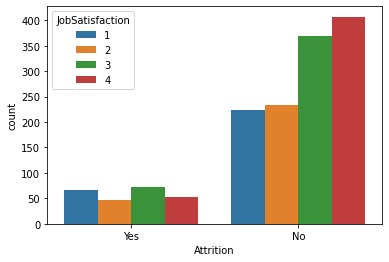

In [32]:
#Exploratory Data Analysis
sns.countplot(x ='Attrition', hue = "JobSatisfaction", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

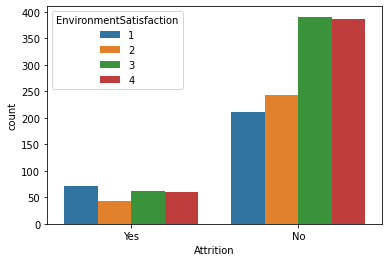

In [33]:
sns.countplot(x ='Attrition', hue = "EnvironmentSatisfaction", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

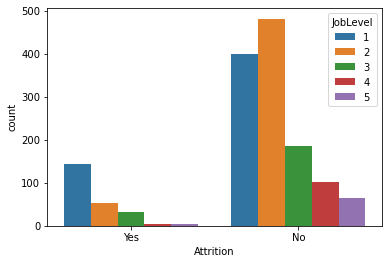

In [34]:
sns.countplot(x ='Attrition', hue = "JobLevel", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

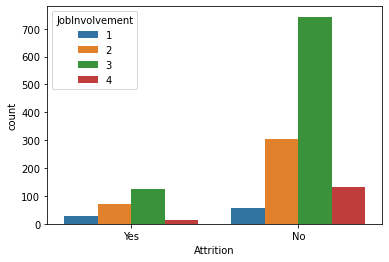

In [35]:
sns.countplot(x ='Attrition', hue = "JobInvolvement", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

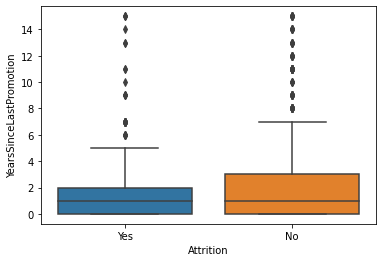

In [36]:
sns.boxplot(x ='Attrition', y = "YearsSinceLastPromotion", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

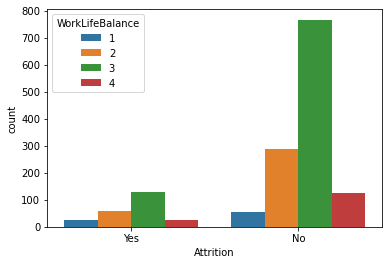

In [37]:
sns.countplot(x ='Attrition', hue = "WorkLifeBalance", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

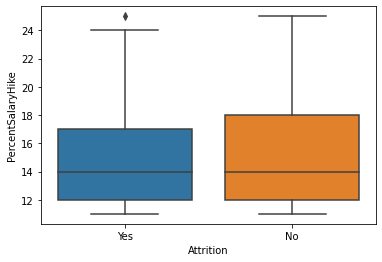

In [38]:
sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

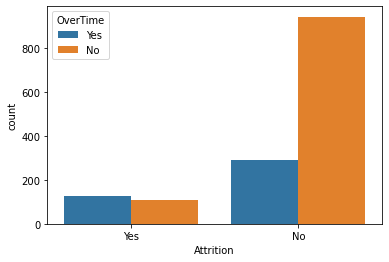

In [39]:
sns.countplot(x ='Attrition', hue = "OverTime", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

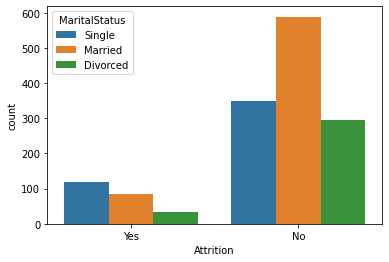

In [40]:
sns.countplot(x ='Attrition', hue = "MaritalStatus", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

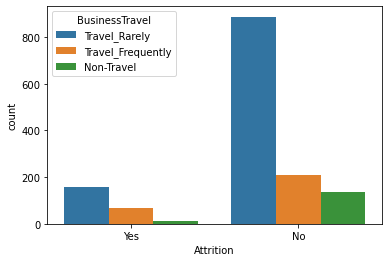

In [41]:
sns.countplot(x ='Attrition', hue = "BusinessTravel", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

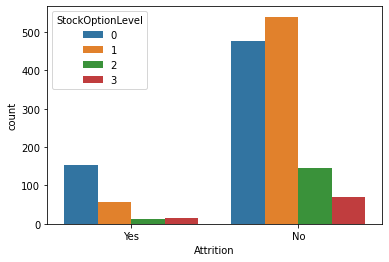

In [42]:
sns.countplot(x ='Attrition', hue = "StockOptionLevel", data = df)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

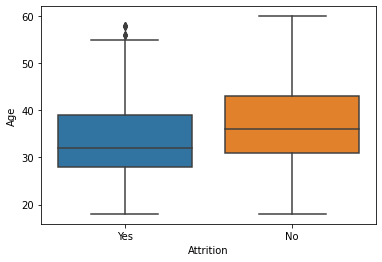

In [43]:
sns.boxplot(x = 'Attrition', y = 'Age', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

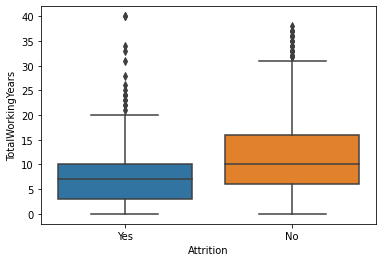

In [44]:
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

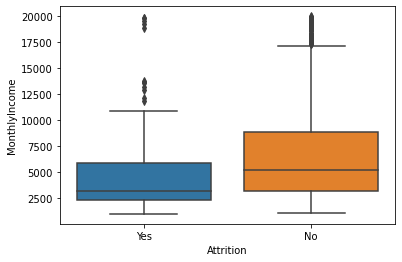

In [45]:
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

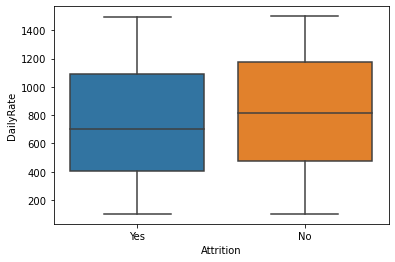

In [46]:
sns.boxplot(x = 'Attrition', y = 'DailyRate', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

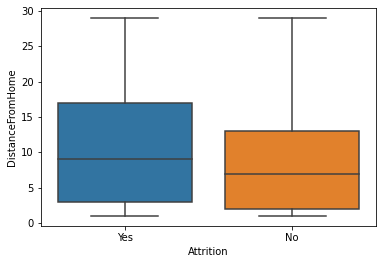

In [47]:
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data = df)

In [48]:
def func(row):
    if row == 'Yes':
        return 1 
    else:
        return 0
y = df['Attrition'].apply(lambda x: func(x))
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [49]:
#Building the Random Forest Model and inspecting the results and features of importance
def RFbasedDataset(df):
    X = df.drop(['Attrition','EmployeeCount','EmployeeNumber','Over18','StandardHours','DailyRate','MonthlyRate','HourlyRate'], axis = 1)
    y = df['Attrition'].apply(lambda x: func(x))
    categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole','OverTime']

    # Option 2: One-Hot Encoding (for nominal categorical variables)
    ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
    encoded_features = ohe.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_cols))
    X = X.drop(columns=categorical_cols).reset_index(drop=True).join(encoded_df)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=500)
    # Initialize SMOTE
    from collections import Counter
    smote = SMOTE(random_state=42)

    # Fit and apply SMOTE to the training data
    X_res, y_res = smote.fit_resample(X_train, y_train)


    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_res, y_res)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    print(classification_report(y_pred, y_test))

    # Calculate F1 score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The accuracy score of the Random Forest model is: {accuracy:.2f}")
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"The F1 score of the Random Forest model is: {f1:.2f}")

    feature_importances2 = rf_model.feature_importances_
    my_dict2 = {k: v for k, v in zip(X_train.columns, feature_importances2)}


    sorted_d = dict(sorted(my_dict2.items(), key=operator.itemgetter(1), reverse=False))
    print(sorted_d)
    plt.figure(figsize=(20,20))
    plt.barh(list(sorted_d.keys())[20:], list(sorted_d.values())[20:])
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       345
           1       0.27      0.70      0.39        23

    accuracy                           0.86       368
   macro avg       0.62      0.79      0.66       368
weighted avg       0.93      0.86      0.89       368

The accuracy score of the Random Forest model is: 0.86
The F1 score of the Random Forest model is: 0.84
{'JobRole_Research Director': 0.0014580256938168826, 'JobRole_Manager': 0.0018779852166943356, 'JobRole_Human Resources': 0.0026596840829439436, 'PerformanceRating': 0.003821312394313395, 'EducationField_Other': 0.004363961574771944, 'JobRole_Manufacturing Director': 0.005589334967364483, 'EducationField_Marketing': 0.008583016767492532, 'EducationField_Technical Degree': 0.00902364541570582, 'JobRole_Sales Representative': 0.00988449408940848, 'BusinessTravel_Travel_Rarely': 0.012546109420322731, 'Gender_Male': 0.012752401799933148, 'JobRole_Sales Executive': 0.

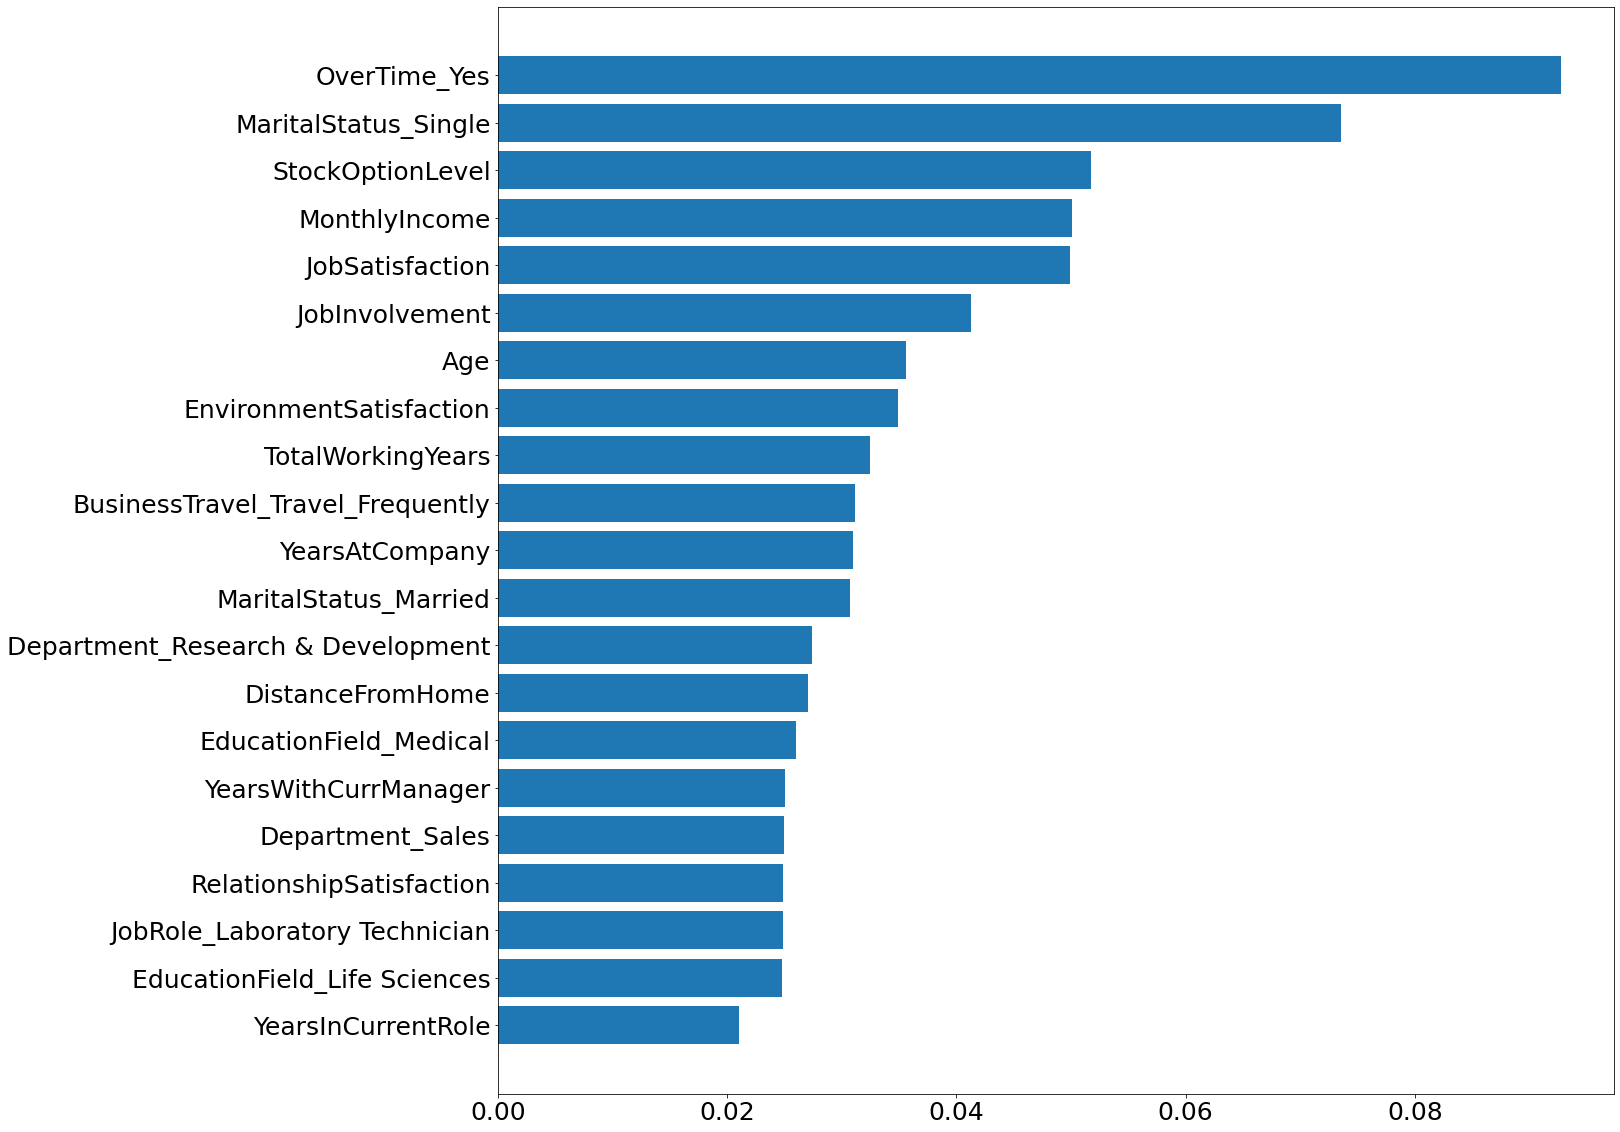

In [50]:
#Inspecting attrition in IBM
RFbasedDataset(df)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       106
           1       0.26      1.00      0.41         6

    accuracy                           0.85       112
   macro avg       0.63      0.92      0.66       112
weighted avg       0.96      0.85      0.89       112

The accuracy score of the Random Forest model is: 0.85
The F1 score of the Random Forest model is: 0.81
{'EducationField_Other': 0.002015589815079165, 'EducationField_Technical Degree': 0.005527232454243276, 'JobRole_Sales Executive': 0.005722971344564926, 'PerformanceRating': 0.008199232925110211, 'JobRole_Sales Representative': 0.00932777063377632, 'Gender_Male': 0.016486691451867774, 'BusinessTravel_Travel_Rarely': 0.01969683872305588, 'EducationField_Medical': 0.02004911607577157, 'Education': 0.02048951164857335, 'JobLevel': 0.020909629023252854, 'EducationField_Marketing': 0.021518321654050383, 'NumCompaniesWorked': 0.021963716277871925, 'YearsInCurrentRole':

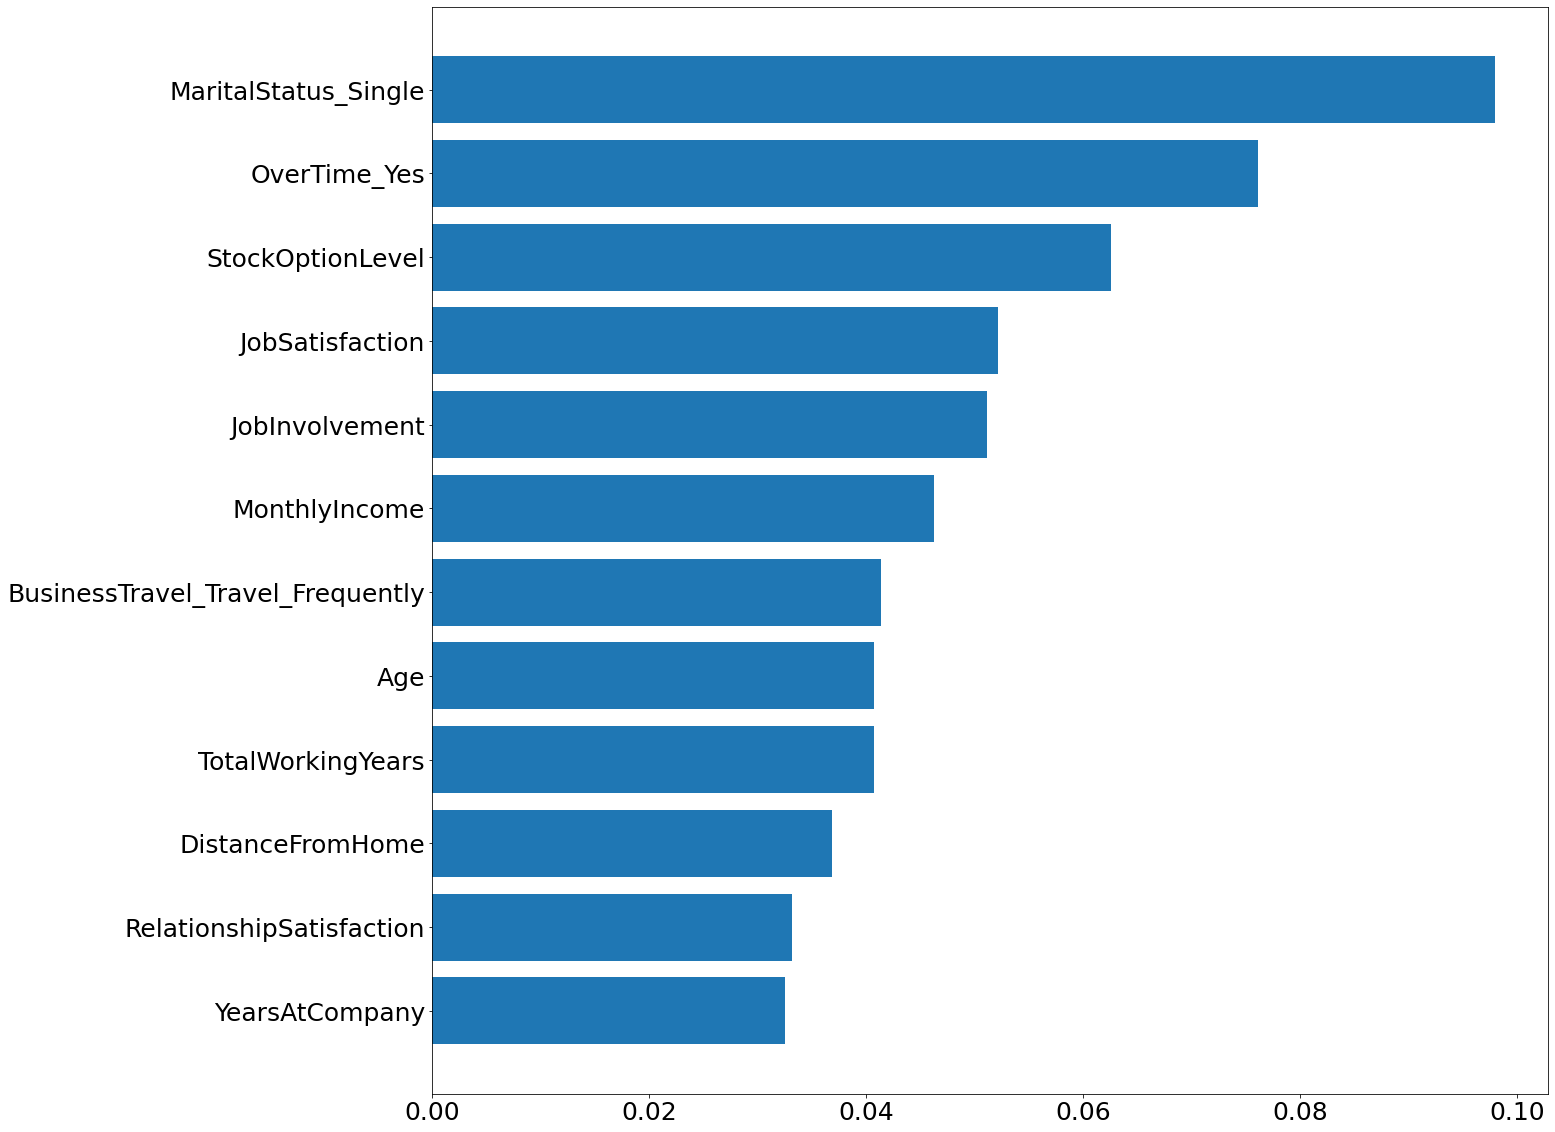

In [51]:
#Inspecting attrition in Sales Department
df_Sales = df[df['Department'] == 'Sales']
RFbasedDataset(df_Sales)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       229
           1       0.27      0.75      0.40        12

    accuracy                           0.89       241
   macro avg       0.63      0.82      0.67       241
weighted avg       0.95      0.89      0.91       241

The accuracy score of the Random Forest model is: 0.89
The F1 score of the Random Forest model is: 0.86
{'JobRole_Research Director': 0.0016114866796548047, 'JobRole_Manager': 0.0020953760916047077, 'PerformanceRating': 0.002739998171128292, 'EducationField_Other': 0.004870033701286808, 'JobRole_Manufacturing Director': 0.007602218932693072, 'EducationField_Technical Degree': 0.015243466283091976, 'NumCompaniesWorked': 0.016130868585888657, 'YearsSinceLastPromotion': 0.017041271337436797, 'JobRole_Research Scientist': 0.01804195588762181, 'EducationField_Medical': 0.018883529346155017, 'Education': 0.019111655386964545, 'BusinessTravel_Travel_Rarely': 0.01920119626

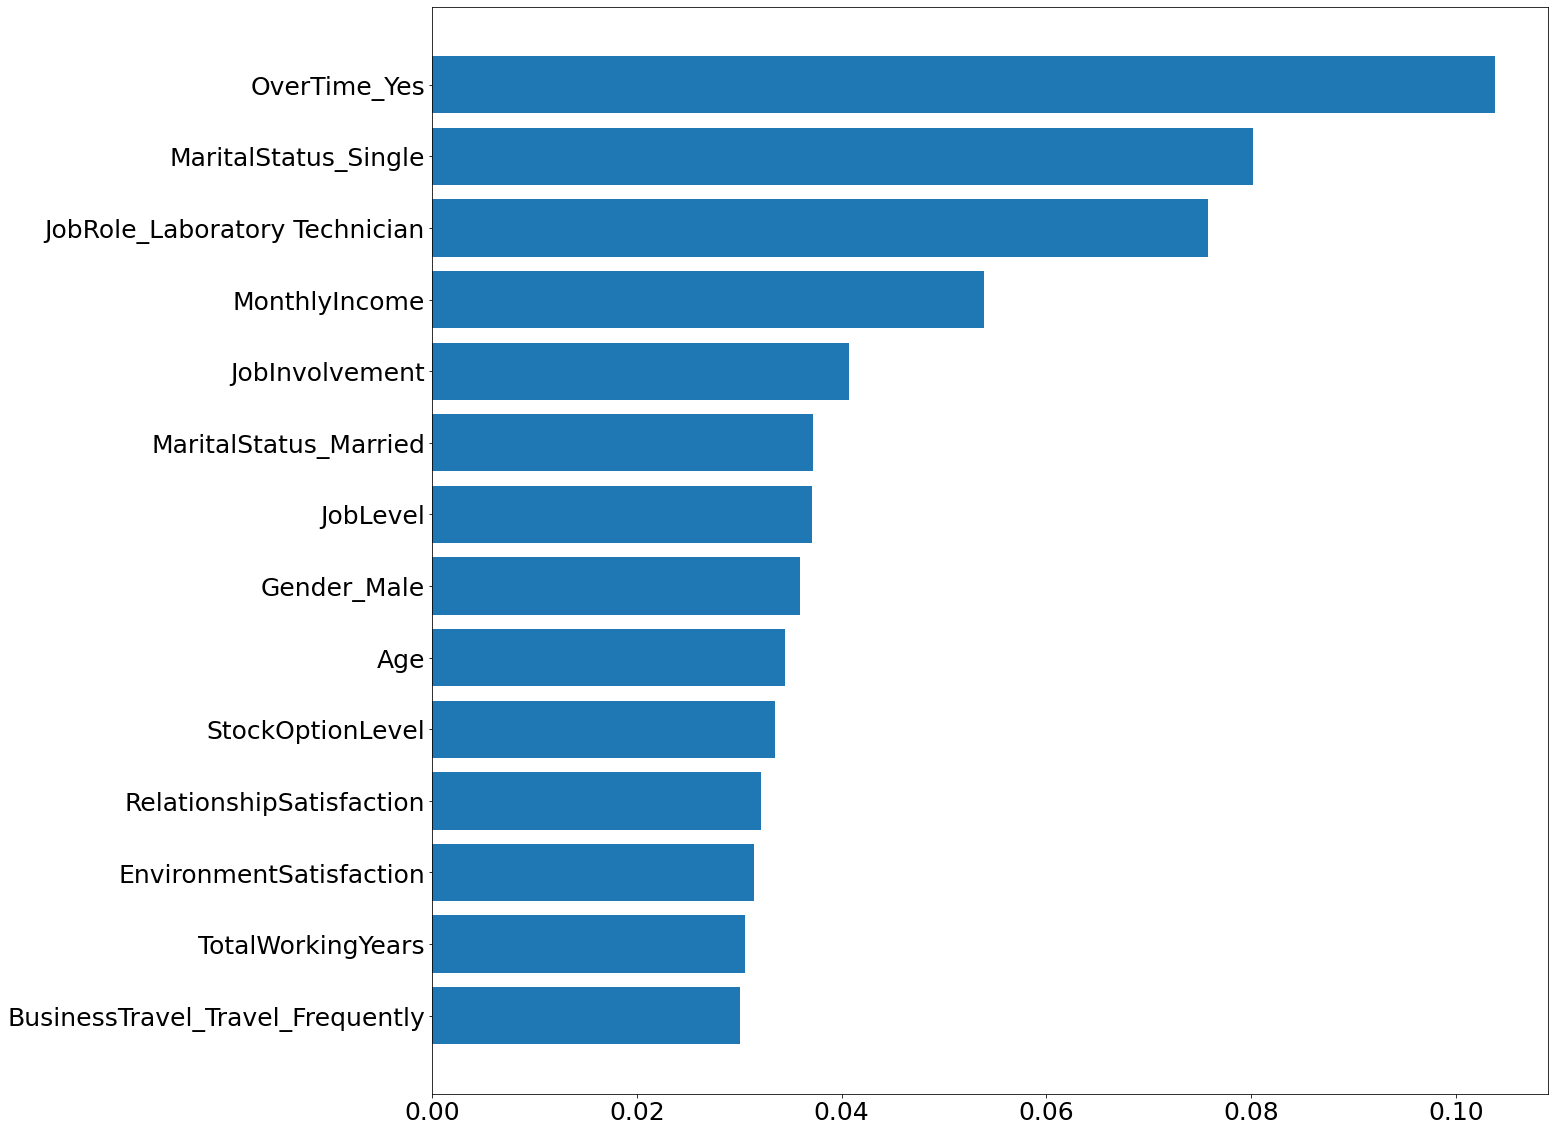

In [52]:
#Inspecting attrition in R&D Department
df_RD = df[df['Department'] == 'Research & Development']
RFbasedDataset(df_RD)